In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
np.random.seed(42)

In [3]:
def data_with_mask(x, width_window=10, x_margin=0, y_margin=0):
    assert width_window > 0 and width_window < 20, 'width_window should be integer from range [1, 20]' 
    masks = np.ones_like(x)
    for i in range(x.shape[0]):
        xi = np.random.randint(x_margin, 28 - width_window - x_margin)
        yi = np.random.randint(y_margin, 28 - width_window - y_margin)
        mask = np.ix_([i], np.arange(yi, yi+ width_window), np.arange(xi, xi+ width_window))
        masks[mask] = None
    return masks

In [4]:
# X_full = np.loadtxt("missing_mnist\mnist.txt", delimiter=",")
# X_missing = np.loadtxt("missing_mnist\missing_mnist.txt", delimiter=",")
# y = np.loadtxt("missing_mnist\labels_mnist.txt", delimiter=",")

In [6]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.values
X = X/255.
y = np.asarray(y, dtype=np.int32)

In [7]:
# X

In [8]:
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')
# X = mnist.data
# y = mnist.target

# y = y.astype(np.float64)
# X = X.astype(np.float64)

In [9]:
x=X.reshape(-1,28,28)
width_window = 12
print('Original size of image: {}'.format(x.shape))
masks = data_with_mask(x, width_window=width_window, x_margin=5, y_margin=0)
x_masked = x * masks
print('Size image with mask 10 x 10: {}'.format(x_masked.shape))
X_missing = x_masked.reshape(-1,784)

Original size of image: (70000, 28, 28)
Size image with mask 10 x 10: (70000, 28, 28)


In [10]:
y = (y == 5)

In [11]:
X.shape

(70000, 784)

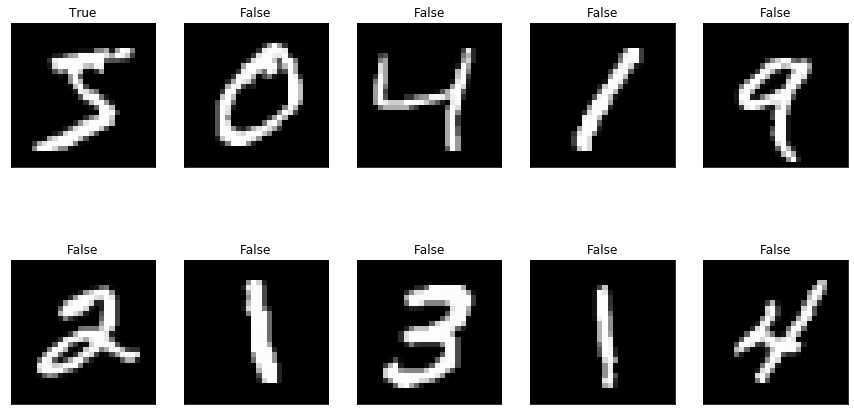

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y, X, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show() 

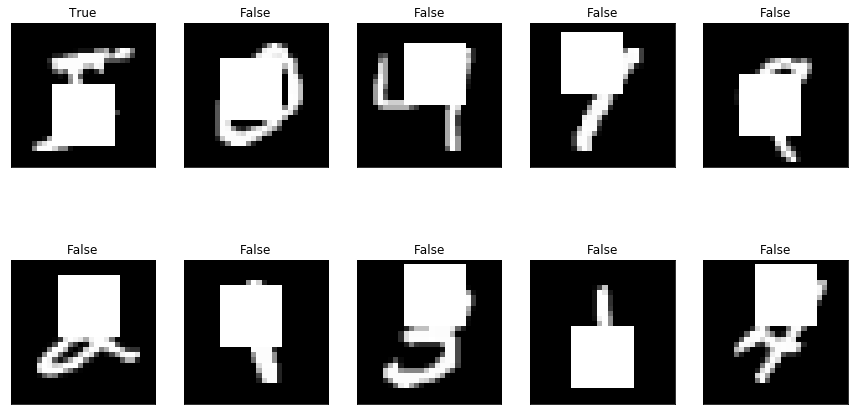

In [13]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y, X_missing, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show() 

# Zad. 

Stwórzmy **LogisticRegression** i naucz go na całym zbiorze treningowym.


In [14]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=42)
clf.fit(X, y)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [15]:
y_pred = clf.predict(X)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.99      0.99     63687
        True       0.91      0.81      0.86      6313

    accuracy                           0.98     70000
   macro avg       0.95      0.90      0.92     70000
weighted avg       0.98      0.98      0.98     70000



In [18]:
from sklearn.impute import SimpleImputer

imr = SimpleImputer(strategy='median')
imr = imr.fit(X_missing)

X_missing_fill = imr.transform(X_missing)
X_missing_fill

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

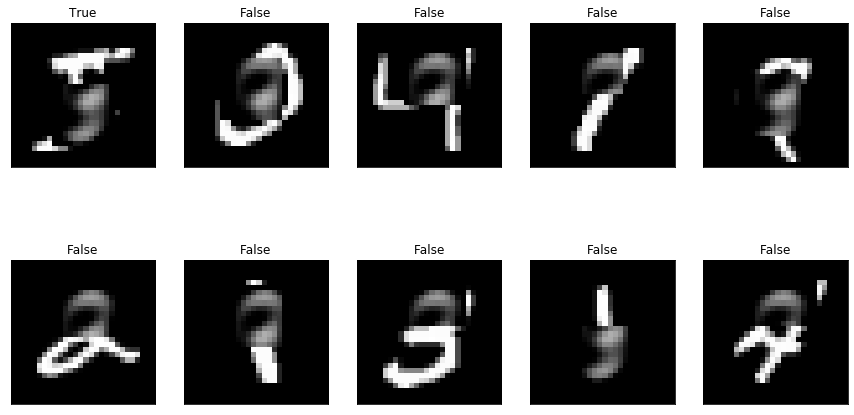

In [19]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y, X_missing_fill, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show() 

In [20]:
clf.fit(X_missing_fill, y)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.99      0.99     63687
        True       0.91      0.81      0.86      6313

    accuracy                           0.98     70000
   macro avg       0.95      0.90      0.92     70000
weighted avg       0.98      0.98      0.98     70000

